## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# REAL ESTATE ANALYSIS

## Business Understanding  
The real estate industry in King County, Washington, is a key driver of the region's economic growth, fueled by factors like location desirability and diverse housing options. Strong demand is supported by a thriving economy, major tech companies, and attractive amenities in this picturesque area  
As much as the real estate market in King County is booming, there are no  clear and actionable insights on the specific factors that drive the the property prices in the local housing market. Scarcity of such vital information hampers the ability of real estate investors to navigate the market and make informed decisions.   
To address this critical gap, there need for data driven solutions that unravel the intricacies of the King County housing market providing investors with the information they need to improve their knowledge in the local housing market. This will provide knowledge to investors on the interplay of factors affecting property prices and be able to predict the expected price of homes and  boost their confidence to make sound real investment  and property decisions.


## Problem Statement
The challenge is to establish a robust data analysis framework that addresses the complexities including data preparation, exploratory data analysis and regression modeling. Our aim is to offer or provide homeowners and real estate professionals with dependable insights for navigating the ever-changing King County real estate market with confidence.

## Objectives 

* Determine the main features that affect the value of a home.  
* Quantify the effect of the above features on the value of a home.   
* Develop a model to predict the home value.  
* To see if there is a difference in houses renovated and those that were not renovated
* To investigate if there is a difference in houses with a waterfront and those without

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

In [2]:
df_house = pd.read_csv('./data/kc_house_data.csv')
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df_house.shape

(21597, 21)

In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The data has missing values in the waterfront, view and yr_renovated columns, the sqft_basement column is an object, all these need to be dealt with

## Data Cleaning

### Missing Values

In [5]:
#We will start with the 'waterfront' column
df_house['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [6]:
# We will start by looking at the percentage of missing values 
# We will start with the waterfront column
(df_house['waterfront'].isna().sum()/len(df_house['waterfront']))*100

11.00152798999861

In [7]:
# 11% of the data is missing
# We will fill according to zipcode
df_house['waterfront'] = df_house.groupby('zipcode')['waterfront'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [8]:
df_house['waterfront'].isna().sum()

0

In [9]:
df_house['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [10]:
# We will now move to the view column
df_house['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [11]:
(df_house['view'].isna().sum()/len(df_house['view']))*100

0.29170718155299347

In [12]:
# 3% of the data is missing and this can be dropped
df_house.dropna(subset=['view'], inplace=True)
df_house['view'].isna().sum()

0

In [13]:
# Our rows have also reduced
df_house.shape

(21534, 21)

In [14]:
# We will now move on to the yr_renovated column
df_house['yr_renovated'].value_counts()

0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
#Looks like ost of the houses were not renovated let us see the percentage of missing values
(df_house['yr_renovated'].isna().sum()/len(df_house['yr_renovated']))*100

17.785827064177578

In [16]:
# 17% of missing values
#these cannot be dropped but it will be safe to assume that the ones without year were not renovated as well
df_house['yr_renovated'].fillna(0.0, inplace=True)
df_house['yr_renovated'].isna().sum()


0

In [17]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  object 
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

We have successfully handled the missing values now to move n to the data types

In [18]:
#We will start with the sqft_basement column
df_house['sqft_basement'].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
1930.0        1
1852.0        1
172.0         1
415.0         1
2490.0        1
Name: sqft_basement, Length: 302, dtype: int64

In [19]:
# The ? does not belong there, some houses have 0.0 as the sqft_basement meaning that they might not have a basement
# We will replace ? with 0
df_house['sqft_basement'] = df_house['sqft_basement'].replace('?', '0.0')
df_house['sqft_basement'] = pd.to_numeric(df_house['sqft_basement'])

In [20]:
df_house['sqft_basement'].value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
588.0         1
1920.0        1
602.0         1
1245.0        1
1135.0        1
Name: sqft_basement, Length: 301, dtype: int64

In [21]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21534 non-null  object 
 11  grade          21534 non-null  object 
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  float64
 14  yr_built       21534 non-null  int64  
 15  yr_renovated   21534 non-null  float64
 16  zipcode        21534 non-null  int64  
 17  lat            21534 non-null  float64
 18  long  

In [22]:
# We can also change the date column into datetime
df_house["date"] = pd.to_datetime(df_house["date"])
print(df_house["date"].dtype)

datetime64[ns]


In [23]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21534 non-null  int64         
 1   date           21534 non-null  datetime64[ns]
 2   price          21534 non-null  float64       
 3   bedrooms       21534 non-null  int64         
 4   bathrooms      21534 non-null  float64       
 5   sqft_living    21534 non-null  int64         
 6   sqft_lot       21534 non-null  int64         
 7   floors         21534 non-null  float64       
 8   waterfront     21534 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21534 non-null  object        
 11  grade          21534 non-null  object        
 12  sqft_above     21534 non-null  int64         
 13  sqft_basement  21534 non-null  float64       
 14  yr_built       21534 non-null  int64         
 15  yr_renovated   2153

In [24]:
# Now we look for duplicates
duplicates = df_house.duplicated()
print(df_house[duplicates])

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


In [25]:
# None of the entries are duplicated, let us check if anyone bought or sold houses multiple times
duplicatesid = df_house.duplicated(subset=['id'])
num_duplicates = duplicatesid.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 177


177 bought/sold houses multiple times. Since none of the entries are the same we can leave the duplicated ids


In [26]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,1788.557537,285.244311,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,827.745641,439.334095,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [27]:
# Let us now look for outliers in our numerical columns
def outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    length = len(outliers)
    len_lower = len(df[df[column] < lower_bound])
    len_upper = len(df[df[column] > upper_bound])
    return length, Q1 , Q3 , len_lower, len_upper

In [28]:
outliers(df_house,'price')

(1153, 322000.0, 645000.0, 0, 1153)

We have 1153 outliers and the data has outliers above the upper bound which is 645000.  
Meaning the data is skewed positively

In [29]:
outliers(df_house,'sqft_above')

(609, 1190.0, 2210.0, 0, 609)

In [30]:
outliers(df_house, 'sqft_basement')

(556, 0.0, 550.0, 0, 556)

In [31]:
outliers(df_house, 'sqft_living')

(567, 1430.0, 2550.0, 0, 567)

We have sqft_above, sqft_basement and sqft_living having positively skewed data

In [32]:
# The maximum of the bedrooms is 33
# Let's see the range of bedrooms
df_house['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [33]:
# 33 bedrooms out of houses with 1-11 bedrooms is too much, the 11 bedroom also might be an outlier
# Let us look at the price to see if it's an error 
df_house[df_house['bedrooms'] == 33]['price']

15856    640000.0
Name: price, dtype: float64

In [34]:
df_house[df_house['bedrooms']== 3]['price'].mean()

466352.51547339396

In [35]:
df_house[df_house['bedrooms']== 1]['price'].mean()

318239.4591836735

In [36]:
df_house[df_house['bedrooms']== 11]['price']

8748    520000.0
Name: price, dtype: float64

In [37]:
df_house[df_house['bedrooms']== 1]['price'].min()

80000.0

In [38]:
df_house[df_house['bedrooms']== 10]['price'].min()

650000.0

In [39]:
#For the bedroom outlier we can replace 33 with 3
df_house['bedrooms'] = df_house['bedrooms'].replace(33, 3)

In [40]:
df_house['bedrooms'] = df_house['bedrooms'].replace(11, 1)

In [41]:
df_house['bedrooms'].value_counts()

3     9792
4     6865
2     2754
5     1596
6      270
1      197
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64

We have dealt with the outliers in the bedroom column

In [42]:
df_house['condition']

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21534, dtype: object

In [43]:
# Let us map some of our categorical variables start with 'condition'
df_house['condition'] = df_house['condition'].replace('Very Good', 'Very_Good') # or 'VeryGood'
df_house.loc[:,'condition'] = df_house['condition'].map({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very_Good': 5})
print(df_house['condition'].unique())

[3 5 4 1 2]


In [44]:
#For the grade column as well
grade_mapper = {
    "3 Poor" : 1,
    "4 Low" : 2,
    "5 Fair" : 3,
    "6 Low Average" : 4,
    "7 Average" : 5,
    "8 Good" : 6,
    "9 Better" : 7,
    "10 Very Good" : 8,
    "11 Excellent" : 9,
    "12 Luxury" : 10,
    "13 Mansion" : 11
}
df_house["grade"] = df_house["grade"].map(grade_mapper)
df_house["grade"]

0        5
1        5
2        4
3        5
4        6
        ..
21592    6
21593    6
21594    5
21595    6
21596    5
Name: grade, Length: 21534, dtype: int64

In [45]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.371180,2.115712,2079.827854,1.509060e+04,1.494126,3.409724,5.657425,1788.557537,285.244311,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,2.876779e+09,3.660596e+05,0.902793,0.768602,917.446520,4.138021e+04,0.539806,0.650654,1.172643,827.745641,439.334095,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001,27255.483308
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,5.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,3.000000,5.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,4.000000,6.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,11.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## DATA ANALYSIS AND FEATURE ENGINEERING
We will now move to feature engineering and data analysis. Some feature engineering that could be relevant to this data is age of the house, whether the house was renovated or not, whether the house has a basement or not

### Feature Engineering

In [46]:
#Age of house
df_house['YearHouseSold'] = pd.to_datetime(df_house['date'], format='%m/%d/%Y').dt.year

In [47]:
def calculate_house_age(row):
    if row['yr_renovated'] == 0:
        return row['YearHouseSold'] - row['yr_built']
    else:
        return row['YearHouseSold'] - row['yr_renovated']

# Apply the function to each row
df_house['HouseAge'] = df_house.apply(calculate_house_age, axis=1)


In [48]:
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,YearHouseSold,HouseAge
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,23.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5.0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,1.0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,5.0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,11.0


In [49]:
#Renovted or not renovated
df_house['Renovated'] = df_house['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [50]:
#Basement or no basement
df_house['Basement'] = df_house['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

## Univariate Analysis
Here we will look at various distributions

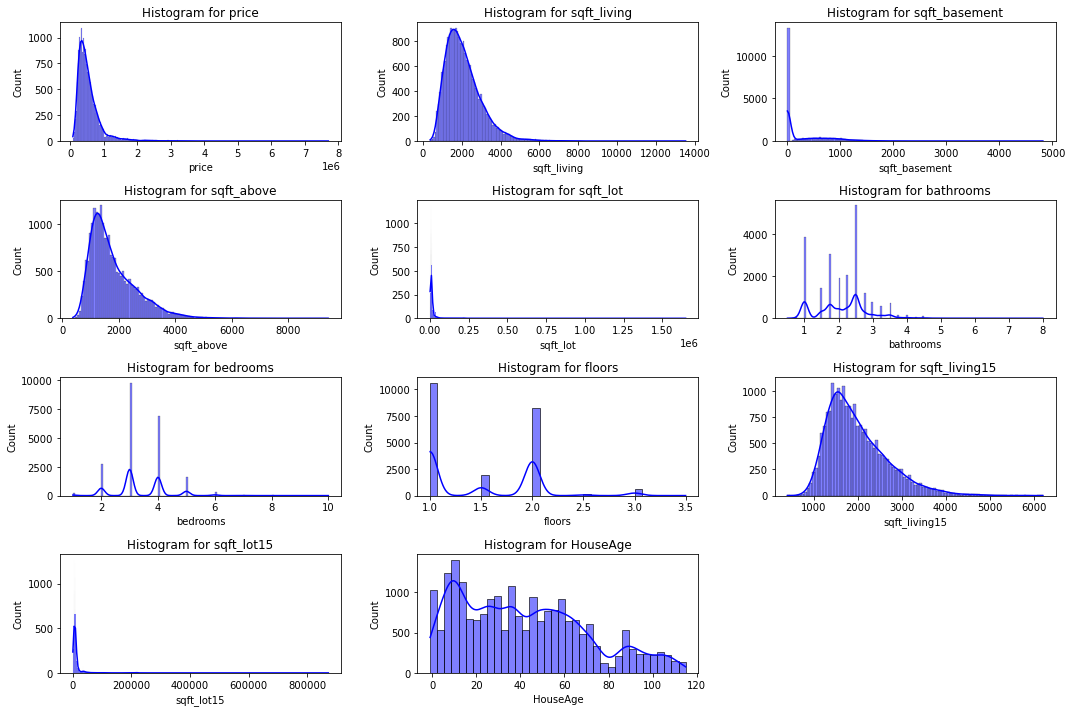

In [58]:
columns = ['price','sqft_living','sqft_basement','sqft_above', 'sqft_lot', 
           'bathrooms', 'bedrooms', 'floors', 'sqft_living15', 'sqft_lot15','HouseAge']

num_columns = 3  # Number of columns in the grid
num_rows = (len(columns) + num_columns - 1) // num_columns  # Calculate the number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

# Flatten the axes if there's only one row or one column
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_columns == 1:
    axes = axes.reshape(-1, 1)

# Plot histograms in the subplots
for i, column in enumerate(columns):
    row_index = i // num_columns
    col_index = i % num_columns
    ax = axes[row_index, col_index]
    
    sns.histplot(df_house[column], kde=True, color='blue', ax=ax)
    ax.set_title(f'Histogram for {column}')

# Remove empty subplots if the number of subplots is less than the number of columns * rows
if len(columns) < num_columns * num_rows:
    for i in range(len(columns), num_columns * num_rows):
        row_index = i // num_columns
        col_index = i % num_columns
        fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()


From the above the square feet are all skewed as we saw when viewing outliers,price is also skewed 

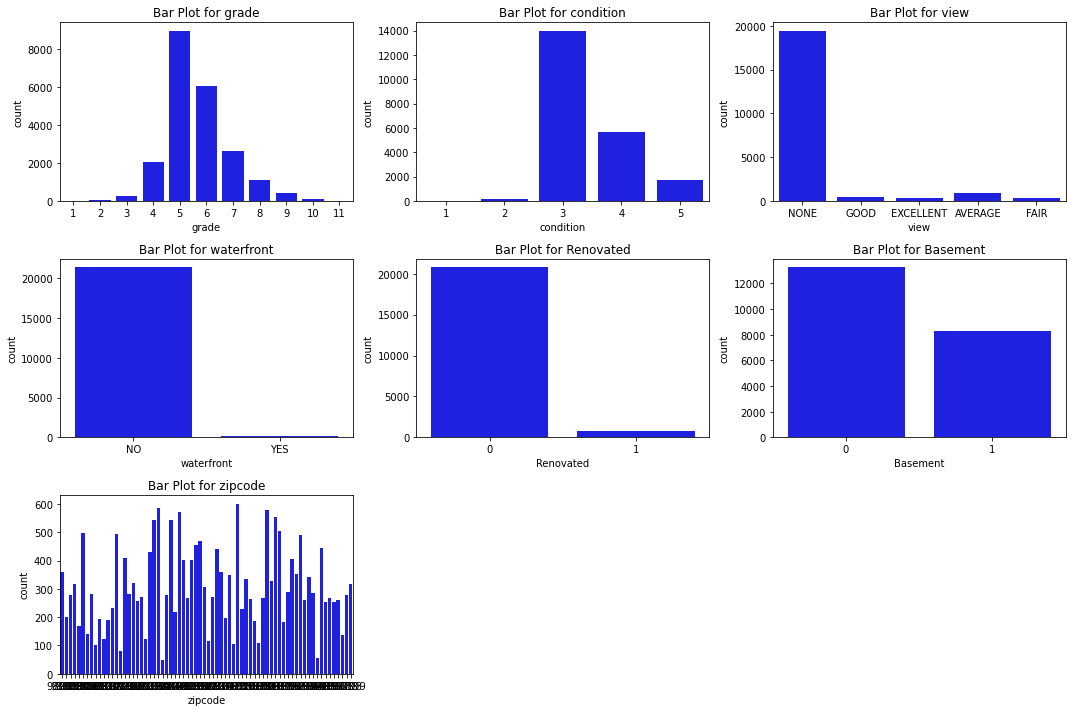

In [68]:
# Now let us take a look at the categorical columns
columns2 = ['grade', 'condition', 'view', 'waterfront','Renovated', 'Basement', 'zipcode']

num_columns = 3  # Number of columns in the grid
num_rows = (len(columns2) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

# Flatten the axes if there's only one row or one column
if num_rows == 1:
    axes = axes.reshape(1, -1)
elif num_columns == 1:
    axes = axes.reshape(-1, 1)

# Plot histograms in the subplots
for i, column in enumerate(columns2):
    row_index = i // num_columns
    col_index = i % num_columns
    ax = axes[row_index, col_index]
    
    sns.countplot(data=df_house, x=column, color='blue', ax=ax)
    ax.set_title(f'Bar Plot for {column}')
# Remove empty subplots if the number of subplots is less than the number of columns * rows
if len(columns2) < num_columns * num_rows:
    for i in range(len(columns2), num_columns * num_rows):
        row_index = i // num_columns
        col_index = i % num_columns
        fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()


From the above most houses have been graded average, most houses have an average condition, most houses have no view, most houses have no waterfront, most houses have not been renovated, most houses do not have a basement but nota great differnce in number with those that do have a basement

## Bivariate Analysis
Now we will compare price with various features, scatter plot for the numerical variables and boxplot for the categorical variables or a bar plot

In [ ]:
#Numerical Variable